In [80]:
import numpy
import matplotlib.pyplot as pylot
import pandas
import seaborn
%matplotlib inline

In [81]:
salary_df = pandas.read_csv('../data/Salary_Data.csv')
year_exp = salary_df.iloc[:, :-1].values
salary = salary_df.iloc[:, 1:].values

salary_df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


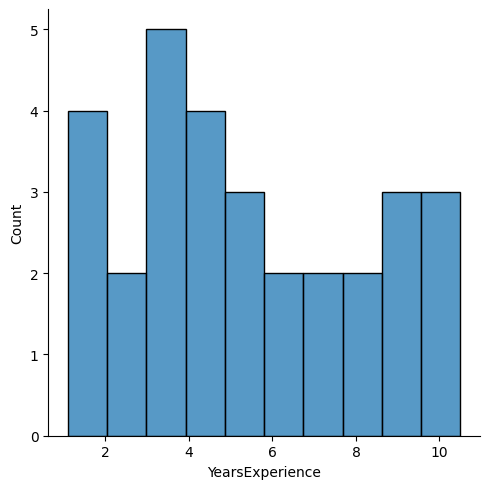

In [82]:
seaborn.displot(salary_df["YearsExperience"], kde=False, bins=10)
pylot.show()

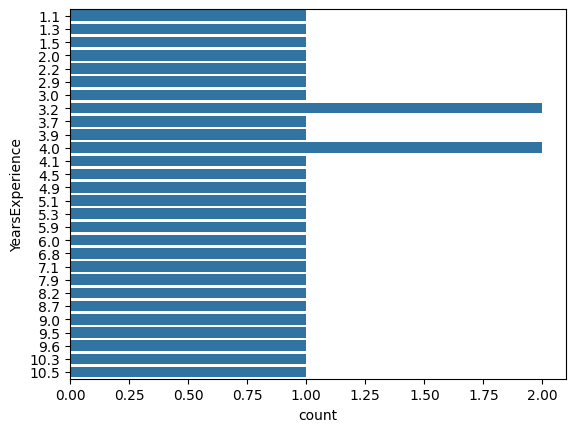

In [83]:
seaborn.countplot(y='YearsExperience', data=salary_df)
pylot.show()

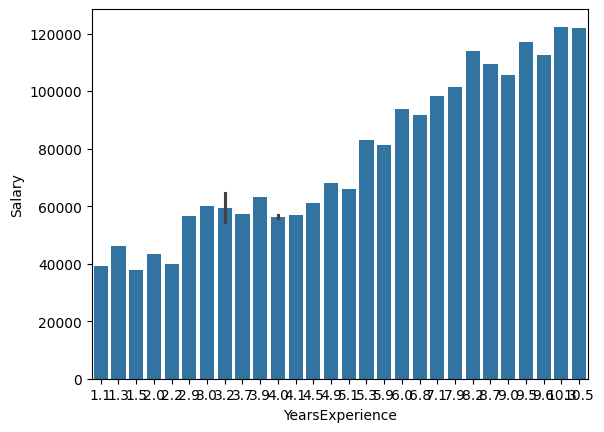

In [84]:
seaborn.barplot(x="YearsExperience", y="Salary", data=salary_df)
pylot.show()

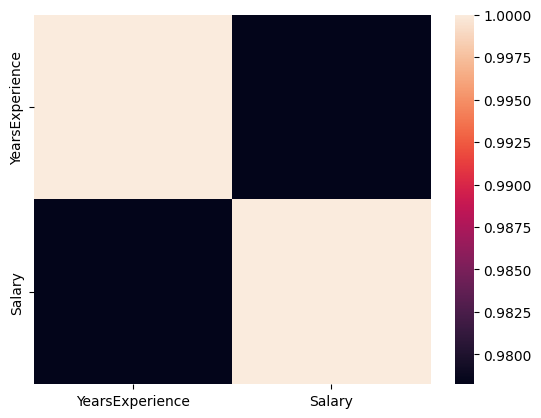

In [85]:
seaborn.heatmap(salary_df.corr())
pylot.show()

In [86]:
df = pandas.DataFrame({
    "area": [2600, 3000, 3200, 3600, 4000],
    "price": [550000, 565000, 610000, 680000, 725000]
})
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


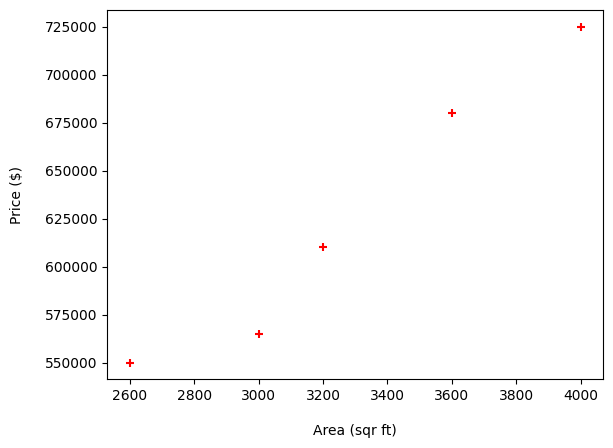

In [87]:
pylot.scatter(df["area"], df["price"], color="red", marker="+")

pylot.xlabel("Area (sqr ft)", labelpad=15)
pylot.ylabel("Price ($)", labelpad=15)

pylot.show()

In [88]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(df[["area"]], df.price)

LinearRegression()

predict_price: [628715.75342466]


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


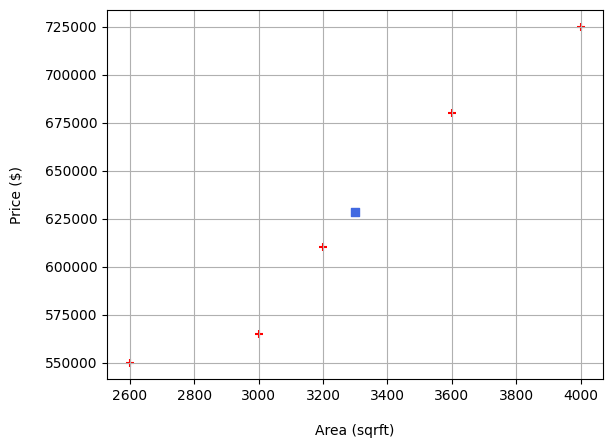

In [89]:
target_area = 3300
predict_price = model.predict(numpy.array([target_area]).reshape(-1, 1))
print(f"predict_price: {predict_price}")

pylot.scatter(df["area"], df["price"], color="red", marker="+")
pylot.scatter(target_area, predict_price, color="royalblue", marker="s")

pylot.xlabel("Area (sqrft)", labelpad=15)
pylot.ylabel("Price ($)", labelpad=15)

pylot.grid()
pylot.show()

In [90]:
model.coef_

array([135.78767123])

In [91]:
model.intercept_

180616.43835616432

In [92]:
# price = coef x target_area + intercept
(model.coef_ * target_area) + model.intercept_

array([628715.75342466])

In [93]:
df_area = pandas.DataFrame({
    "area": [1000, 1500, 2300, 3540, 4120, 4560, 5490, 3460, 4750, 2300, 9000, 8600, 7100]
})

df_area.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [94]:
price_pred = model.predict(df_area)
area_pred = model.predict(df[['area']])

print(f"price_pred: \n{price_pred}", "\n")
print(f"area_pred: \n{area_pred}")

price_pred: 
[ 316404.10958904  384297.94520548  492928.08219178  661304.79452055
  740061.64383562  799808.21917808  926090.75342466  650441.78082192
  825607.87671233  492928.08219178 1402705.47945205 1348390.4109589
 1144708.90410959] 

area_pred: 
[533664.38356164 587979.45205479 615136.98630137 669452.05479452
 723767.12328767]


In [95]:
df_area["prices"] = price_pred
df_area.to_csv("../data/price_prediction.csv")

   area
0  2600
1  3000
2  3200
3  3600
4  4000
[533664.38356164 587979.45205479 615136.98630137 669452.05479452
 723767.12328767]


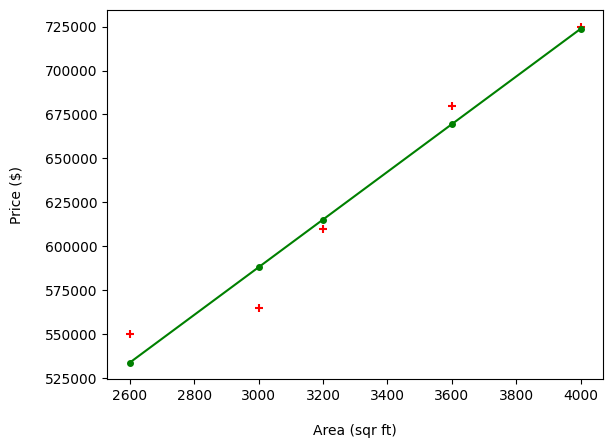

In [96]:
pylot.scatter(df["area"], df["price"], color="red", marker="+")
pylot.plot(df["area"], model.predict(df[['area']]), color="green", marker="o", markersize=4)

pylot.xlabel("Area (sqr ft)", labelpad=15)
pylot.ylabel("Price ($)", labelpad=15)

print(df[["area"]])
print(model.predict(df[["area"]]))

pylot.show()

In [97]:
df = pandas.DataFrame({
    "area": [2600, 3000, 3200, 3600, 4000],
    "bedrooms": [3.0, 4.0, float("NaN"), 3.0, 5.0],
    "age": [20, 15, 18, 30, 8],
    "price": [550000, 565000, 610000, 595000, 760000]
})
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [98]:
import math

median_bedrooms = math.floor(df["bedrooms"].median())
median_bedrooms

3

In [99]:
df["bedrooms"] = df["bedrooms"].fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,3.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000


In [100]:
model = LinearRegression()

model.fit(df[["area", "bedrooms", "age"]], df["price"])

LinearRegression()

In [101]:
model.coef_

array([   137.25, -26025.  ,  -6825.  ])

In [102]:
model.intercept_

383724.9999999998

In [103]:
model.predict([[3000, 3, 40]]) # [ area, bedrooms, age ]

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([444400.])

In [104]:
model.coef_[0] * 3000 + model.coef_[1] * 3 + model.coef_[2] * 40 + model.intercept_

444400.0

In [105]:
model.predict([[2500, 4, 5]])

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([588625.])

In [106]:
(model.coef_[0] * 2500) + (model.coef_[1] * 4) + (model.coef_[2] * 5) + model.intercept_

588625.0

### Exercise

In [107]:
hiring_df = pandas.read_csv('../data/hiring.csv')
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [108]:
# fill NaN to zero

hiring_df["experience"] = hiring_df["experience"].fillna("zero")
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [109]:
# fill NaN to median

median_test_score = hiring_df["test_score(out of 10)"].median()

hiring_df["test_score(out of 10)"] = hiring_df["test_score(out of 10)"].fillna(median_test_score)
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [110]:
# word to number

from word2number import w2n

hiring_df["experience"] = hiring_df["experience"].apply(w2n.word_to_num)
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [111]:
model = LinearRegression()
model.fit(hiring_df[["experience", 'test_score(out of 10)', 'interview_score(out of 10)']], hiring_df['salary($)'])

LinearRegression()

In [112]:
model.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [113]:
model.intercept_

17737.263464337688

In [114]:
(model.coef_[0] * 2) + (model.coef_[1] * 9) + (model.coef_[2] * 6) + model.intercept_

53205.96797671033

In [115]:
experience = 2
test_score = 9
interview_score = 6

predict_1 = numpy.array([[experience, test_score, interview_score]])

predict_salary_1 = model.predict(predict_1)
predict_salary_1

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([53205.96797671])

In [116]:
new_candidate = {
    'experience': experience ,
    'test_score(out of 10)': test_score,
    'interview_score(out of 10)': interview_score,
    'salary($)': predict_salary_1[0]
}

hiring_df.loc[len(hiring_df)] = new_candidate
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000.000000
1,0,8.0,6,45000.000000
2,5,6.0,7,60000.000000
3,2,10.0,10,65000.000000
4,7,9.0,6,70000.000000
5,3,7.0,10,62000.000000
6,10,8.0,7,72000.000000
7,11,7.0,8,80000.000000
8,2,9.0,6,53205.967977


In [117]:
model.fit(hiring_df[["experience", "test_score(out of 10)", "interview_score(out of 10)"]], hiring_df["salary($)"])

LinearRegression()

In [118]:
model.coef_

array([2812.95487627, 1845.70596798, 2205.24017467])

In [119]:
model.intercept_

17737.263464337695

In [120]:
experience = 12
test_score = 10
interview_score = 10

salary_predict_2 = model.predict([[experience, test_score, interview_score]])
salary_predict_2

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([92002.18340611])

In [121]:
(model.coef_[0] * experience) + (model.coef_[1] * test_score) + (model.coef_[2] * interview_score) + model.intercept_

92002.18340611356

In [122]:
new_candidate = {
    "experience": experience,
    "test_score(out of 10)": test_score, 
    "interview_score(out of 10)": interview_score,
    "salary($)": salary_predict_2[0]
}

hiring_df.loc[len(hiring_df)] = new_candidate

In [123]:
hiring_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000.000000
1,0,8.0,6,45000.000000
2,5,6.0,7,60000.000000
3,2,10.0,10,65000.000000
4,7,9.0,6,70000.000000
5,3,7.0,10,62000.000000
6,10,8.0,7,72000.000000
7,11,7.0,8,80000.000000
8,2,9.0,6,53205.967977
9,12,10.0,10,92002.183406


In [124]:
df = pandas.DataFrame({
    "area": [2600, 3000, 3200, 3600, 4000],
    "price": [550000, 565000, 610000, 680000, 725000]
})
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [125]:
model = LinearRegression()
model.fit(df[["area"]], df["price"])

LinearRegression()

In [126]:
model.coef_

array([135.78767123])

In [127]:
model.intercept_

180616.43835616432

In [128]:
model.predict([[5000]])

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [129]:
df = pandas.DataFrame({
    "town": ["monroe township", "monroe township", "monroe township", "monroe township", "monroe township", "west windsor", "west windsor", "west windsor", "west windsor", "robinsville", "robinsville", "robinsville", "robinsville", ],
    "area": [2600, 3000, 3200, 3600, 4000, 2600, 2800, 3300, 3600, 2600, 2900, 3100, 3600],
    "price": [550000, 565000, 610000, 680000, 725000, 585000, 615000, 650000, 710000, 575000, 600000, 620000, 695000]
})

print(df["town"].size)
df

13


,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [130]:
dummies = pandas.get_dummies(df["town"])
dummies

,monroe township,robinsville,west windsor
0,True,False,False
1,True,False,False
2,True,False,False
3,True,False,False
4,True,False,False
5,False,False,True
6,False,False,True
7,False,False,True
8,False,False,True
9,False,True,False


In [131]:
merged = pandas.concat([df, dummies], axis=1)
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,True,False,False
1,monroe township,3000,565000,True,False,False
2,monroe township,3200,610000,True,False,False
3,monroe township,3600,680000,True,False,False
4,monroe township,4000,725000,True,False,False
5,west windsor,2600,585000,False,False,True
6,west windsor,2800,615000,False,False,True
7,west windsor,3300,650000,False,False,True
8,west windsor,3600,710000,False,False,True
9,robinsville,2600,575000,False,True,False


In [132]:
final = merged.drop(['town', 'west windsor'], axis=1)
final

,area,price,monroe township,robinsville
0,2600,550000,True,False
1,3000,565000,True,False
2,3200,610000,True,False
3,3600,680000,True,False
4,4000,725000,True,False
5,2600,585000,False,False
6,2800,615000,False,False
7,3300,650000,False,False
8,3600,710000,False,False
9,2600,575000,False,True


In [133]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [134]:
x = final.drop('price', axis=1)
x

,area,monroe township,robinsville
0,2600,True,False
1,3000,True,False
2,3200,True,False
3,3600,True,False
4,4000,True,False
5,2600,False,False
6,2800,False,False
7,3300,False,False
8,3600,False,False
9,2600,False,True


In [135]:
y = final.price
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [136]:
model.fit(x, y)

LinearRegression()

In [137]:
model.predict([[2800, False, True]])

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([590775.63964739])

In [138]:
model.predict([[3400, False, False]])

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([681241.66845839])

In [139]:
model.score(x, y)

0.9573929037221872

In [140]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [141]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [142]:
dfle = df
dfle['town'] = le.fit_transform(dfle["town"]) 
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [143]:
x = dfle[['town', 'area']].values
x

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]], dtype=int64)

In [144]:
y = dfle["price"]
y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [145]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

In [146]:
x = ohe.fit_transform(x).toarray()
x

array([[1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [147]:
x = x[:, 1:]
x

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [148]:
model.fit(x, y)

LinearRegression()

In [149]:
# model.predict([[1, 0, 2800]])

In [150]:
df = pandas.read_csv('../data/carprices.csv')
df

,Mileage,Age(yrs),Sell Price($)
0,69000,6,18000
1,35000,3,34000
2,57000,5,26100
3,22500,2,40000
4,46000,4,31500
5,59000,5,26750
6,52000,5,32000
7,72000,6,19300
8,91000,8,12000
9,67000,6,22000


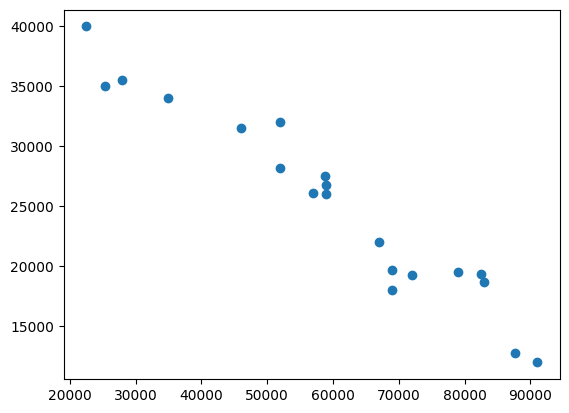

In [151]:
import matplotlib.pyplot as pylot
%matplotlib inline

pylot.scatter(df["Mileage"], df["Sell Price($)"])
pylot.show()

In [152]:
x = df[['Mileage', 'Age(yrs)']]
y = df['Sell Price($)']
print(f"size_x: {x.size}\n\n", x.head(), "\n\n")
print(f"size_y: {y.size}\n\n", y.head(), "\n\n")

size_x: 40

    Mileage  Age(yrs)
0    69000         6
1    35000         3
2    57000         5
3    22500         2
4    46000         4 


size_y: 20

 0    18000
1    34000
2    26100
3    40000
4    31500
Name: Sell Price($), dtype: int64 




In [153]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [165]:
print(x_train.head(), "\n")
print(y_train.head(), "\n")
print(x_train.size)
print(y_train.size)

    Mileage  Age(yrs)
3     22500         2
18    87600         8
13    58780         4
2     57000         5
14    82450         7 

3     40000
18    12800
13    27500
2     26100
14    19400
Name: Sell Price($), dtype: int64 

32
16


In [166]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [167]:
print(x_train.head(), "\n\n")
print(y_train.head(), "\n\n")
print(x_test)

    Mileage  Age(yrs)
3     22500         2
18    87600         8
13    58780         4
2     57000         5
14    82450         7 


3     40000
18    12800
13    27500
2     26100
14    19400
Name: Sell Price($), dtype: int64 


    Mileage  Age(yrs)
7     72000         6
10    83000         7
5     59000         5
6     52000         5


In [169]:
print(x_test, "\n")
print(y_test)

    Mileage  Age(yrs)
7     72000         6
10    83000         7
5     59000         5
6     52000         5 

7     19300
10    18700
5     26750
6     32000
Name: Sell Price($), dtype: int64


In [157]:
model.predict(x_test)

array([20474.0745775 , 16352.07892168, 25174.14834912, 27197.42175439])

In [158]:
model.score(x_train, y_train)

0.9552040227313671

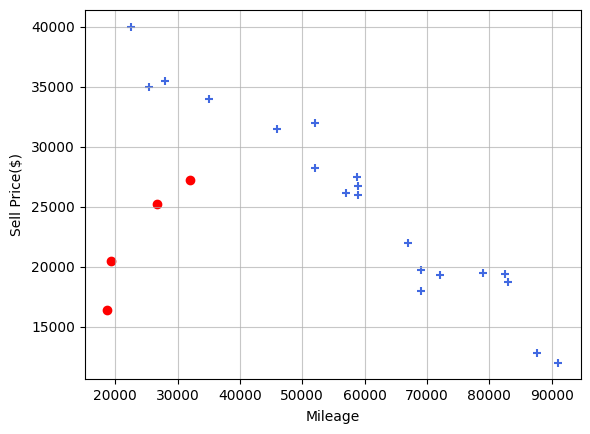

In [322]:
pylot.scatter(df["Mileage"], df["Sell Price($)"], color="royalblue", marker="+")

mileage = numpy.array(y_test).reshape(-1, 1)
price_pred = model.predict(x_test).reshape(-1, 1)

for i in range(0, x_test["Mileage"].size):
    pylot.scatter(numpy.array(y_test)[i], model.predict(x_test)[i], color="red")

pylot.xlabel("Mileage", labelpad=5)
pylot.ylabel("Sell Price($)", labelpad=5)

pylot.grid(alpha=0.7)
pylot.show()

In [324]:
pandas.DataFrame(numpy.hstack((mileage, price_pred)), columns=["Mileage", "Price Prediction ($)"])

,Mileage,Price Prediction ($)
0,19300.0,20474.074578
1,18700.0,16352.078922
2,26750.0,25174.148349
3,32000.0,27197.421754
